<a href="https://colab.research.google.com/github/patilaakash619/projects-on-machine-learning-and-deep-learing./blob/main/Proj9_Restaurant_Reviews_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Data Preprocesing .

In [ ]:
Dataset Link :https://www.kaggle.com/datasets/akram24/restaurant-reviews?select=Restaurant_Reviews.tsv

## Importing Dataset And Link .

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv("/content/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)
# quoting=3: we have many double quotes within the text, we have to ignore these double quotes
# it can lead to an execution error

## Data Exploration .

In [8]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
dataset.shape

(1000, 2)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [12]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing With Missing Value .

In [13]:
dataset.isnull().values.any()

False

## Countplot .

Text(0, 0.5, 'Count')

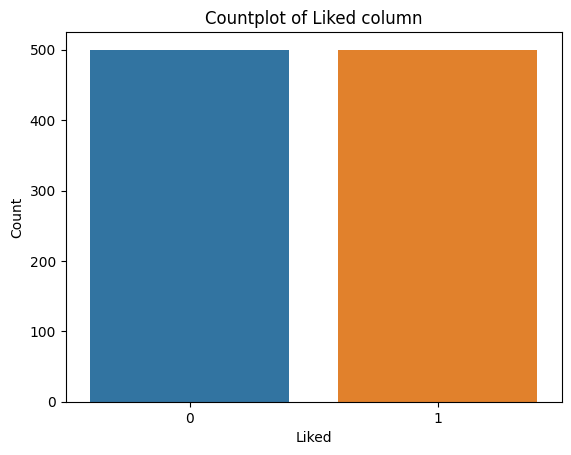

In [14]:
sns.countplot(data = dataset ,x='Liked')
plt.title("Countplot of Liked column")
plt.xlabel("Liked")
plt.ylabel("Count")

In [15]:
#  count of negative (0) , positive (1) reveiw .
(dataset.Liked == 0).sum(),(dataset.Liked == 1).sum()

(500, 500)

## Check length of the messages .

In [16]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
dataset['length'] = dataset['Review'].apply(len)
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

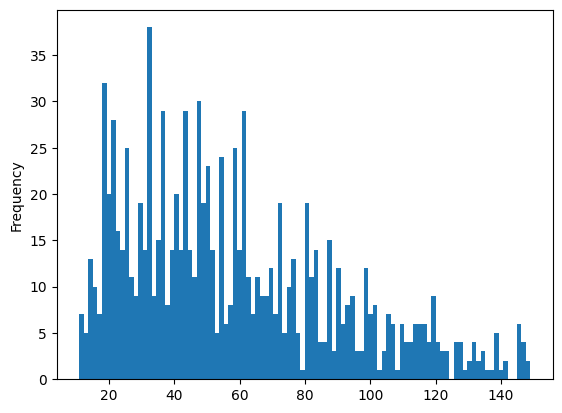

In [18]:
# Frequency Of 'leangth' column through  'histogram' .
dataset['length'].plot(bins=100, kind='hist')

In [19]:

# statistical summary of leangth column.
dataset.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [20]:
# longest message in dataset .
dataset[dataset['length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [21]:
# shortest message in dataset .
dataset[dataset['length']==11]['Review'].iloc[0]

'DELICIOUS!!'

In [22]:
positive = dataset[dataset['Liked']==1]
negative = dataset[dataset['Liked']==0]

In [23]:
positive.head()   # all positive review.

,Review,Liked,length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14


In [24]:
negative.head()   # all negative review.

,Review,Liked,length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111


In [25]:
dataset.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


## Cleaning the texts and creating bag of words model

In [26]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
corpus =[]

for i in range(0,1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review=review.lower()
  review=review.split()

  ps=PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review=[ps.stem(word) for word in review if not word in set(all_stopwords)]

  review= ' '.join(review)
  corpus.append(review)

## Creating A Bag Of Words Model .

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer(max_features=1500)

In [33]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [34]:
x.shape

(1000, 1500)

In [35]:
y.shape

(1000,)

## Splitting The Datasets .

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [37]:
x_train.shape

(800, 1500)

In [38]:

x_test.shape

(200, 1500)

In [39]:
y_train.shape

(800,)

In [40]:
y_test.shape

(200,)

# Part 2 : Model Building .

## 1.Naive Bayes .

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier_nb =GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [43]:
y_pred = classifier_nb.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [45]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Naive Bayes', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.73,0.684211,0.883495,0.771186


In [47]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 42]
 [12 91]]


## 2.XGBoost classifier.

In [48]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [49]:
y_pred = classifier_xgb.predict(x_test)

In [50]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

In [51]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.73,0.684211,0.883495,0.771186
1,XGBoost,0.72,0.797468,0.611650,0.692308


In [52]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81 16]
 [40 63]]


## 3.Random Forest Classifier .

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = classifier_rf.predict(x_test)

In [56]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

In [57]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.730,0.684211,0.883495,0.771186
1,XGBoost,0.720,0.797468,0.611650,0.692308
2,Random Forest,0.775,0.891892,0.640777,0.745763


In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89  8]
 [37 66]]


## 4.SVM Classifier

In [59]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(x_train, y_train)

SVC()

In [60]:
y_pred = classifier_svc.predict(x_test)

In [61]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results], ignore_index=True)

In [62]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.730,0.684211,0.883495,0.771186
1,XGBoost,0.720,0.797468,0.611650,0.692308
2,Random Forest,0.775,0.891892,0.640777,0.745763
3,SVM,0.780,0.893333,0.650485,0.752809


# Part 3 : Final Model (SVM Classifier)

In [63]:
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(x_train, y_train)

SVC()

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

78.0


# Part 4 :Making the prediction. (Positive & Negavtive)

### Positive Review : "Absolutely amazing experience!"

In [68]:
new_review = "Absolutely amazing experience!"
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

[1]


### Negative Review : "Terrible customer service."

In [69]:
new_review = "Terrible customer service."
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

[0]
